In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
X = insurance_one_hot.drop("charges",axis = 1)
y = insurance_one_hot["charges"]


In [10]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(1),
                                       tf.keras.layers.Dense(1)
]) 

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = tf.keras.metrics.mae)

insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8868.5918 - mean_absolute_error: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7887.1597 - mean_absolute_error: 7887.1597
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.0947 - mean_absolute_error: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7859.4336 - mean_absolute_error: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7639.6699 - mean_absolute_error: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.0840 - mean_absolute_error: 7578.0840
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7514.6162 - mean_absolute_error: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7694.1348 - mean_absolute_error: 7694.1348
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss:

In [19]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.2344 - mean_absolute_error: 8628.2344


[8628.234375, 8628.234375]

We'll try 3 things:

  -Increasing the number of layers (2 -> 3)

  -Increasing the number of units in each layer (except for the output layer)

  -Changing the optimizer (from SGD to Adam)

In [25]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = tf.keras.metrics.mae)

history = insurance_model_2.fit(X_train, y_train, epochs = 100, verbose = 0)


In [26]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mean_absolute_error: 4924.5107


[4924.5107421875, 4924.5107421875]

Text(0.5, 0, 'epochs')

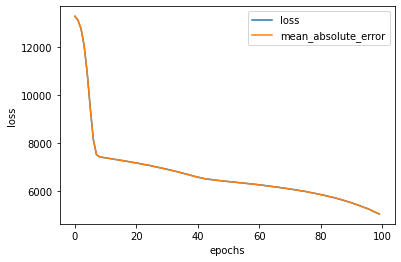

In [28]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [30]:
history_2 = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [31]:
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3210.1184 - mean_absolute_error: 3210.1184


(3210.118408203125, 3210.118408203125)

Text(0.5, 0, 'epochs')

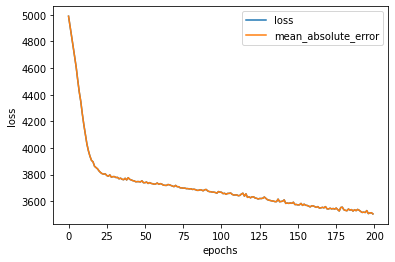

In [32]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# With Preprocessing Data (Normalization and Standardization)




In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [34]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker","region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [36]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [37]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [38]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [39]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [40]:
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3171.5779 - mae: 3171.5779


In [41]:
insurance_model_2_mae, insurance_model_3_mae

(3210.118408203125, 3171.577880859375)